In [1]:
#import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report ,roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier  
from sklearn.metrics import accuracy_score  
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.ensemble import BalancedRandomForestClassifier
from scipy.stats import chi2_contingency, f_oneway
from sklearn.model_selection import train_test_split, GridSearchCV
import lightgbm as lgb
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier






In [85]:
#read the dataset
df=pd.read_csv(r"C:\Users\arwah\OneDrive\Desktop\HealthCare Project\datasets\Student Depression Dataset.csv")
df.head(9)

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
5,33,Male,29.0,Pune,Student,2.0,0.0,5.70,3.0,0.0,Less than 5 hours,Healthy,PhD,No,4.0,1.0,No,0
6,52,Male,30.0,Thane,Student,3.0,0.0,9.54,4.0,0.0,7-8 hours,Healthy,BSc,No,1.0,2.0,No,0
7,56,Female,30.0,Chennai,Student,2.0,0.0,8.04,4.0,0.0,Less than 5 hours,Unhealthy,Class 12,No,0.0,1.0,Yes,0
8,59,Male,28.0,Nagpur,Student,3.0,0.0,9.79,1.0,0.0,7-8 hours,Moderate,B.Ed,Yes,12.0,3.0,No,1


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [87]:
df.describe(include="all")

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
count,27901.000000,27901,27901.000000,27901,27901,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901,27901,27901,27901,27901.000000,27898.000000,27901,27901.000000
unique,NaN,2,NaN,52,14,NaN,NaN,NaN,NaN,NaN,5,4,28,2,NaN,NaN,2,NaN
top,NaN,Male,NaN,Kalyan,Student,NaN,NaN,NaN,NaN,NaN,Less than 5 hours,Unhealthy,Class 12,Yes,NaN,NaN,No,NaN
freq,NaN,15547,NaN,1570,27870,NaN,NaN,NaN,NaN,NaN,8310,10317,6080,17656,NaN,NaN,14398,NaN
mean,70442.149421,NaN,25.822300,NaN,NaN,3.141214,0.000430,7.656104,2.943837,0.000681,NaN,NaN,NaN,NaN,7.156984,3.139867,NaN,0.585499
std,40641.175216,NaN,4.905687,NaN,NaN,1.381465,0.043992,1.470707,1.361148,0.044394,NaN,NaN,NaN,NaN,3.707642,1.437347,NaN,0.492645
min,2.000000,NaN,18.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.000000,NaN,0.000000
25%,35039.000000,NaN,21.000000,NaN,NaN,2.000000,0.000000,6.290000,2.000000,0.000000,NaN,NaN,NaN,NaN,4.000000,2.000000,NaN,0.000000
50%,70684.000000,NaN,25.000000,NaN,NaN,3.000000,0.000000,7.770000,3.000000,0.000000,NaN,NaN,NaN,NaN,8.000000,3.000000,NaN,1.000000
75%,105818.000000,NaN,30.000000,NaN,NaN,4.000000,0.000000,8.920000,4.000000,0.000000,NaN,NaN,NaN,NaN,10.000000,4.000000,NaN,1.000000


In [88]:
df.shape

(27901, 18)

In [89]:
df.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [90]:
df.index

RangeIndex(start=0, stop=27901, step=1)

In [91]:
df.dtypes

id                                         int64
Gender                                    object
Age                                      float64
City                                      object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness          object
Depression                                 int64
dtype: object

In [92]:
#know datatype of data
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Numeric Columns:", numeric_columns)
print("Categorical Columns:", categorical_columns)

Numeric Columns: ['id', 'Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 'Financial Stress', 'Depression']
Categorical Columns: ['Gender', 'City', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']


**Data Cleaning:**

In [93]:
df.isna().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [94]:
df = df.dropna()

In [95]:
df.isna().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [96]:
df.shape

(27898, 18)

In [97]:
# df = df.drop_duplicates()
df.duplicated().sum()

0

In [30]:
# df.drop(["id"],axis=1,inplace=True)

In [98]:
((df["Job Satisfaction"])==0).sum()

27890

In [99]:
df.duplicated().sum()

0

In [102]:
df.shape

(27898, 18)

In [100]:
df.columns


Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [103]:
df.nunique()

id                                       27898
Gender                                       2
Age                                         34
City                                        52
Profession                                  14
Academic Pressure                            6
Work Pressure                                3
CGPA                                       332
Study Satisfaction                           6
Job Satisfaction                             5
Sleep Duration                               5
Dietary Habits                               4
Degree                                      28
Have you ever had suicidal thoughts ?        2
Work/Study Hours                            13
Financial Stress                             5
Family History of Mental Illness             2
Depression                                   2
dtype: int64

In [104]:
def unique_values(df):
    for column in df.columns:
        print(f"Unique values in {column}: {df[column].unique()}\n\n")
unique_values(df)

Unique values in id: [     2      8     26 ... 140689 140690 140699]


Unique values in Gender: ['Male' 'Female']


Unique values in Age: [33. 24. 31. 28. 25. 29. 30. 27. 19. 20. 23. 18. 21. 22. 34. 32. 26. 39.
 35. 42. 36. 58. 49. 38. 51. 44. 43. 46. 59. 54. 48. 56. 37. 41.]


Unique values in City: ['Visakhapatnam' 'Bangalore' 'Srinagar' 'Varanasi' 'Jaipur' 'Pune' 'Thane'
 'Chennai' 'Nagpur' 'Nashik' 'Vadodara' 'Kalyan' 'Rajkot' 'Ahmedabad'
 'Kolkata' 'Mumbai' 'Lucknow' 'Indore' 'Surat' 'Ludhiana' 'Bhopal'
 'Meerut' 'Agra' 'Ghaziabad' 'Hyderabad' 'Vasai-Virar' 'Kanpur' 'Patna'
 'Faridabad' 'Delhi' 'Saanvi' 'M.Tech' 'Bhavna' 'Less Delhi' 'City' '3.0'
 'Less than 5 Kalyan' 'Mira' 'Harsha' 'Vaanya' 'Gaurav' 'Harsh' 'Reyansh'
 'Kibara' 'Rashi' 'ME' 'M.Com' 'Nalyan' 'Mihir' 'Nalini' 'Nandini'
 'Khaziabad']


Unique values in Profession: ['Student' 'Civil Engineer' 'Architect' 'UX/UI Designer'
 'Digital Marketer' 'Content Writer' 'Educational Consultant' 'Teacher'
 'Manager' 'Chef' 'Doctor

**outliers:**

In [105]:
#Identify outliers for numeric columns
outliers_summary = {}
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)  
    Q3 = df[col].quantile(0.75)  
    IQR = Q3 - Q1                  

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers_count = outliers.shape[0]
    outliers_summary[col] = outliers_count

for col, count in outliers_summary.items():
    print(f"Column: {col}, Outliers: {count}")



Column: id, Outliers: 0
Column: Age, Outliers: 12
Column: Academic Pressure, Outliers: 0
Column: Work Pressure, Outliers: 3
Column: CGPA, Outliers: 9
Column: Study Satisfaction, Outliers: 0
Column: Job Satisfaction, Outliers: 8
Column: Work/Study Hours, Outliers: 0
Column: Financial Stress, Outliers: 0
Column: Depression, Outliers: 0


In [106]:
def calculate_outlier_percentage(df):
    outlier_data = []

    for column in df.select_dtypes(include=[np.number]): 
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_percentage = (len(outliers) / len(df)) * 100

        outlier_data.append([column, round(outlier_percentage, 2)])

    return pd.DataFrame(outlier_data, columns=['Feature', 'Outlier Percentage'])

outlier_df = calculate_outlier_percentage(df)
print(outlier_df)

              Feature  Outlier Percentage
0                  id                0.00
1                 Age                0.04
2   Academic Pressure                0.00
3       Work Pressure                0.01
4                CGPA                0.03
5  Study Satisfaction                0.00
6    Job Satisfaction                0.03
7    Work/Study Hours                0.00
8    Financial Stress                0.00
9          Depression                0.00


In [38]:
# #Remove outliers from the dataset
# for col in outliers_summary.keys():
#     Q1 = df[col].quantile(0.25)
#     Q3 = df[col].quantile(0.75)
#     IQR = Q3 - Q1

#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# # Display the updated dataset shape after removing outliers
# print("Dataset shape after removing outliers:", df.shape)


In [40]:
# df[categorical_columns].value_counts(normalize=True)


In [41]:
# df[categorical_columns].apply(lambda col: col.astype(str).str.len().describe())



**Data Visualization:**

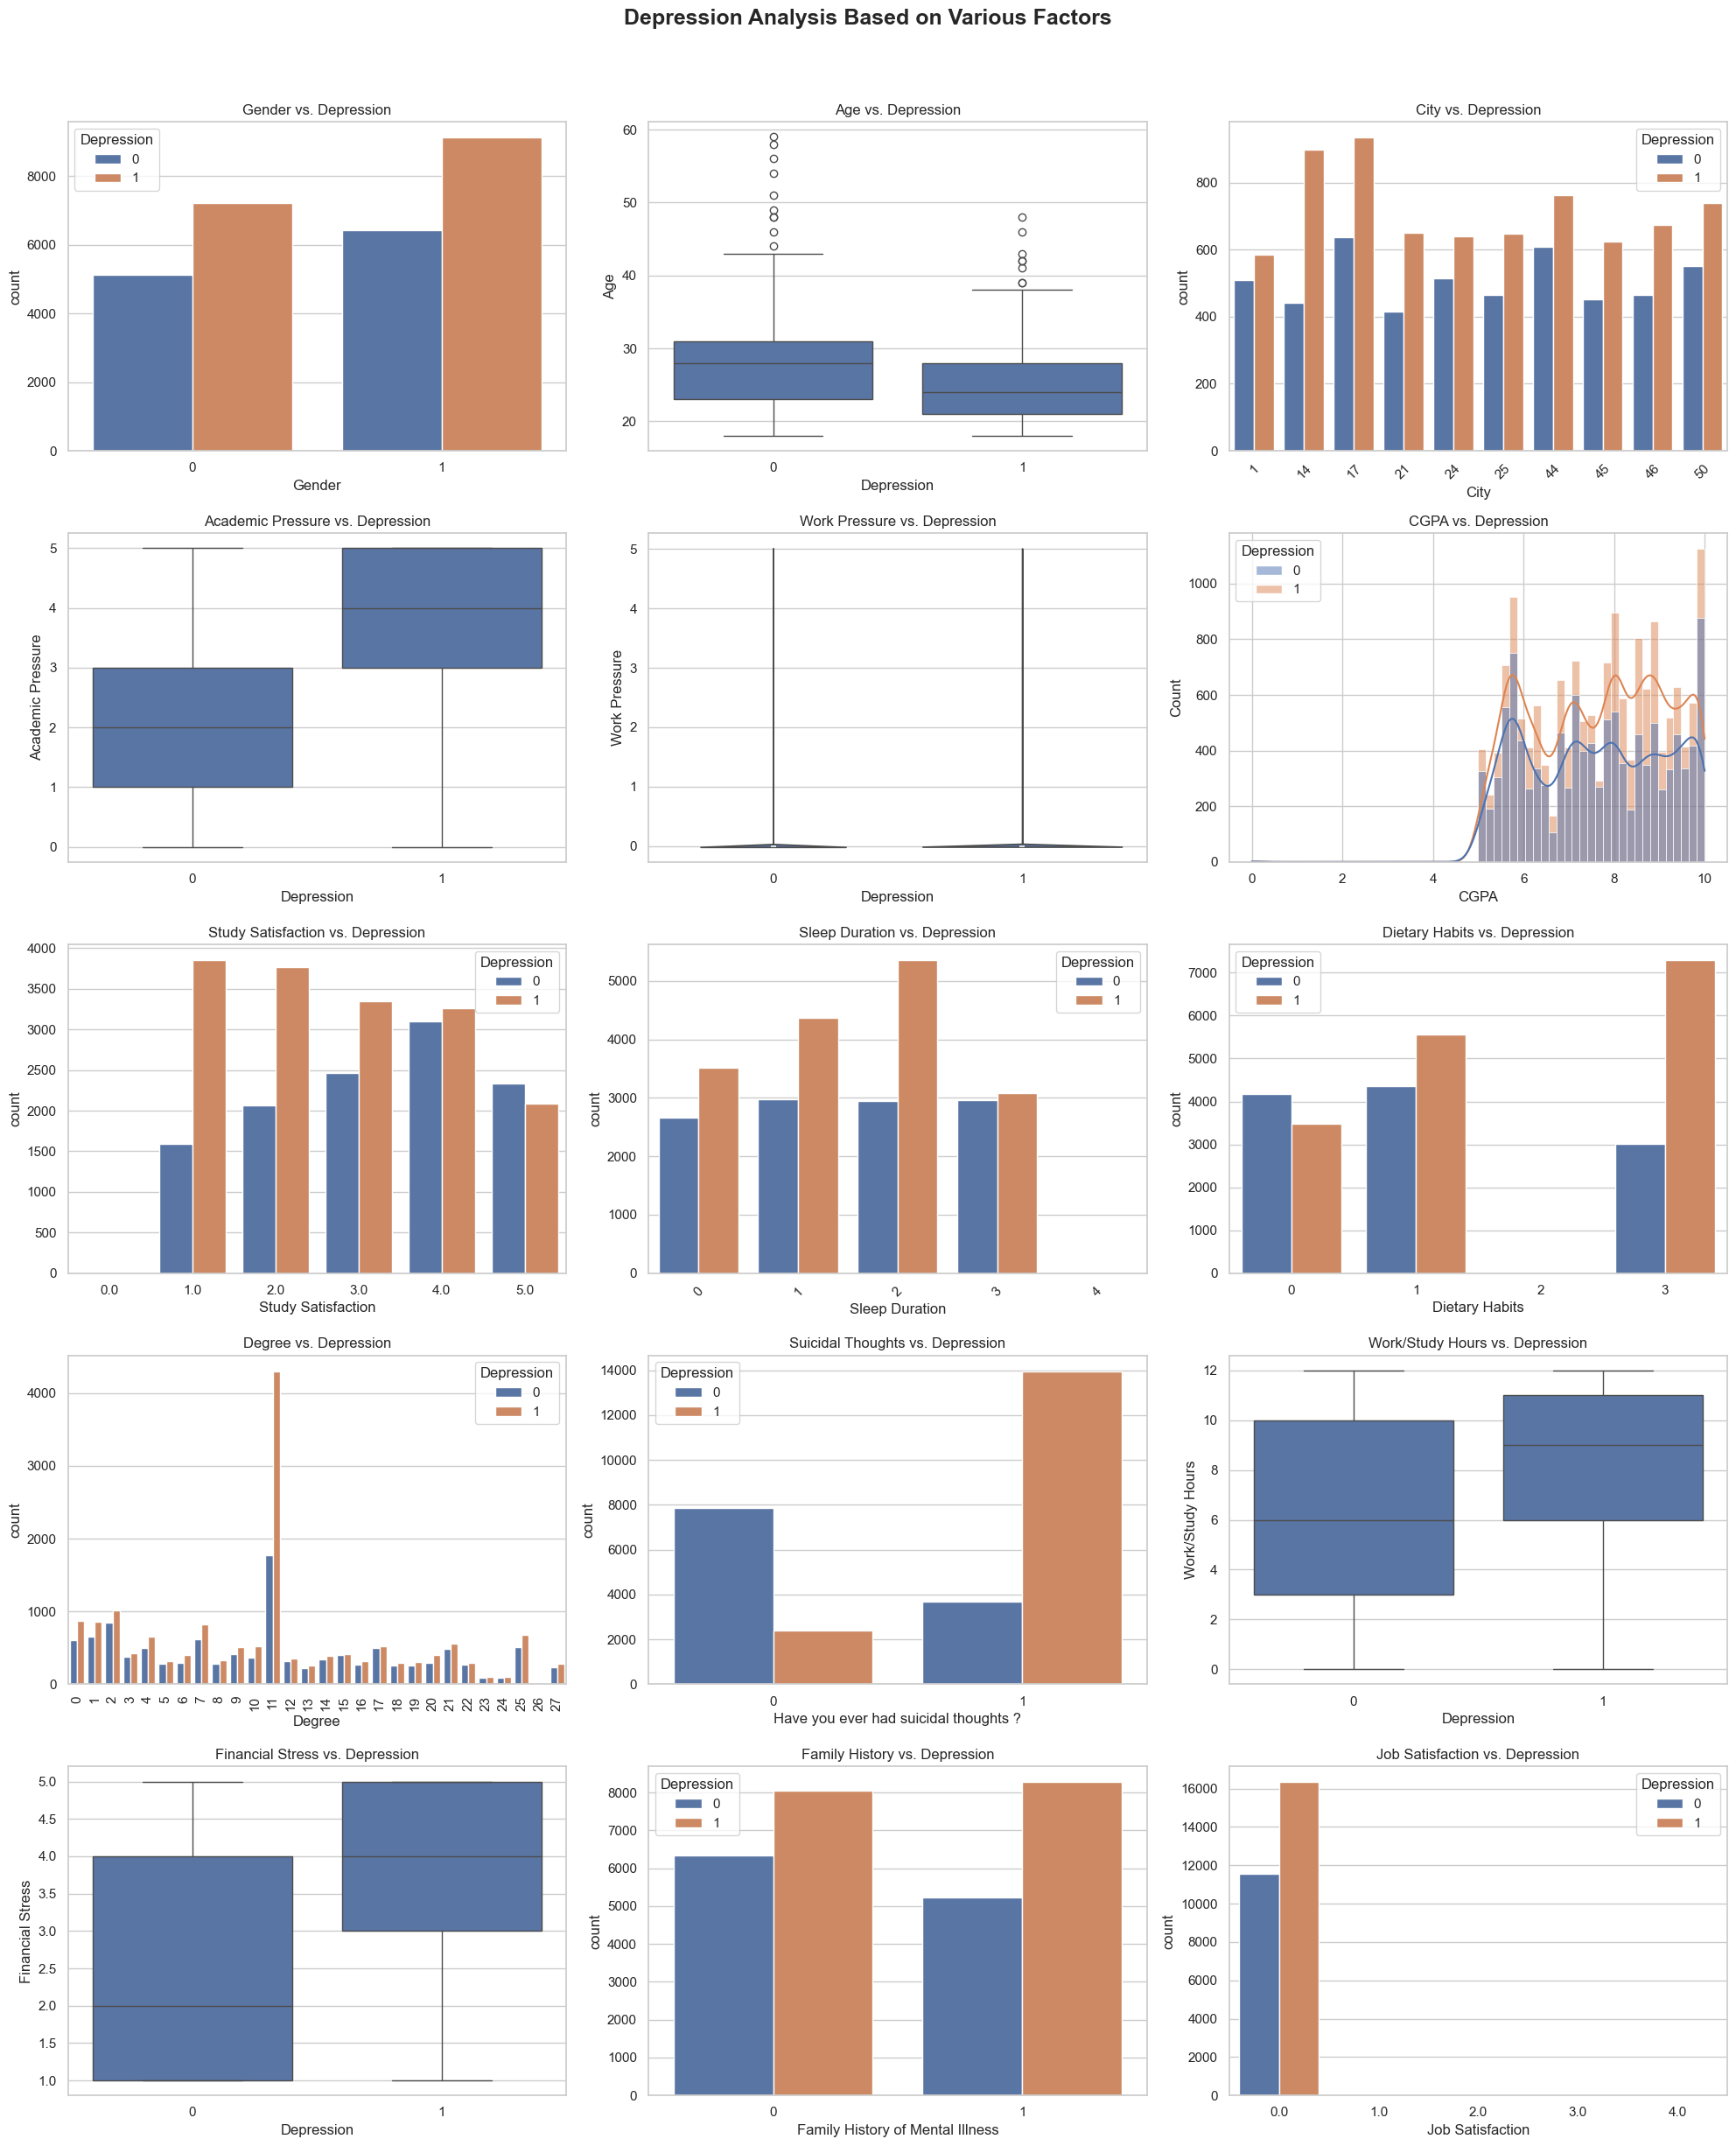

In [96]:
# Set up the figure size and style
sns.set(style="whitegrid")
fig, axes = plt.subplots(5, 3, figsize=(20, 25))  # 5 rows, 3 columns of subplots
fig.suptitle("Depression Analysis Based on Various Factors", fontsize=18, fontweight='bold')

# 1. Gender vs. Depression (Bar Chart)
sns.countplot(x="Gender", hue="Depression", data=df, ax=axes[0, 0])
axes[0, 0].set_title("Gender vs. Depression")

# 2. Age vs. Depression (Box Plot)
sns.boxplot(x="Depression", y="Age", data=df, ax=axes[0, 1])
axes[0, 1].set_title("Age vs. Depression")

# 3. City vs. Depression (Top 10 Cities - Bar Chart)
top_cities = df["City"].value_counts().head(10).index
sns.countplot(x="City", hue="Depression", data=df[df["City"].isin(top_cities)], ax=axes[0, 2])
axes[0, 2].set_title("City vs. Depression")
axes[0, 2].tick_params(axis='x', rotation=45)

# 4. Academic Pressure vs. Depression (Box Plot)
sns.boxplot(x="Depression", y="Academic Pressure", data=df, ax=axes[1, 0])
axes[1, 0].set_title("Academic Pressure vs. Depression")

# 5. Work Pressure vs. Depression (Violin Plot)
sns.violinplot(x="Depression", y="Work Pressure", data=df, ax=axes[1, 1])
axes[1, 1].set_title("Work Pressure vs. Depression")

# 6. CGPA vs. Depression (Histogram)
sns.histplot(data=df, x="CGPA", hue="Depression", kde=True, ax=axes[1, 2])
axes[1, 2].set_title("CGPA vs. Depression")

# 7. Study Satisfaction vs. Depression (Bar Chart)
sns.countplot(x="Study Satisfaction", hue="Depression", data=df, ax=axes[2, 0])
axes[2, 0].set_title("Study Satisfaction vs. Depression")

# 8. Sleep Duration vs. Depression (Stacked Bar Chart)
sns.countplot(x="Sleep Duration", hue="Depression", data=df, ax=axes[2, 1])
axes[2, 1].set_title("Sleep Duration vs. Depression")
axes[2, 1].tick_params(axis='x', rotation=45)

# 9. Dietary Habits vs. Depression (Bar Chart)
sns.countplot(x="Dietary Habits", hue="Depression", data=df, ax=axes[2, 2])
axes[2, 2].set_title("Dietary Habits vs. Depression")

# 10. Degree vs. Depression (Bar Chart)
sns.countplot(x="Degree", hue="Depression", data=df, ax=axes[3, 0])
axes[3, 0].set_title("Degree vs. Depression")
axes[3, 0].tick_params(axis='x', rotation=90)

# 11. Suicidal Thoughts vs. Depression (Stacked Bar Chart)
sns.countplot(x="Have you ever had suicidal thoughts ?", hue="Depression", data=df, ax=axes[3, 1])
axes[3, 1].set_title("Suicidal Thoughts vs. Depression")

# 12. Work/Study Hours vs. Depression (Box Plot)
sns.boxplot(x="Depression", y="Work/Study Hours", data=df, ax=axes[3, 2])
axes[3, 2].set_title("Work/Study Hours vs. Depression")

# 13. Financial Stress vs. Depression (Box Plot)
sns.boxplot(x="Depression", y="Financial Stress", data=df, ax=axes[4, 0])
axes[4, 0].set_title("Financial Stress vs. Depression")

# 14. Family History of Mental Illness vs. Depression (Bar Chart)
sns.countplot(x="Family History of Mental Illness", hue="Depression", data=df, ax=axes[4, 1])
axes[4, 1].set_title("Family History vs. Depression")

# 15. Job Satisfaction vs. Depression (Bar Chart)
sns.countplot(x="Job Satisfaction", hue="Depression", data=df, ax=axes[4, 2])
axes[4, 2].set_title("Job Satisfaction vs. Depression")

# Adjust layout for readability
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [ ]:
# Customize colors and styles
sns.set_style("whitegrid")
custom_palette = ["#ff6f61", "#6b5b95", "#88b04b", "#f7cac9", "#92a8d1"]

# Visualize the outliers
for i, col in enumerate(numeric_columns):
    plt.figure(figsize=(10, 5))
    
    # Boxplot with custom colors
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[col], color=custom_palette[i % len(custom_palette)], linewidth=2.5, fliersize=8)
    plt.title(f'Boxplot for {col}', fontsize=14, fontweight='bold')
    plt.xlabel(col, fontsize=12)
    
    # Histogram with KDE and custom color
    plt.subplot(1, 2, 2)
    sns.histplot(df[col], kde=True, color=custom_palette[i % len(custom_palette)], edgecolor="black", linewidth=1.5)
    plt.title(f'Histogram for {col}', fontsize=14, fontweight='bold')
    plt.xlabel(col, fontsize=12)
    
    plt.tight_layout()
    plt.show()


**Encoding:**

In [58]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = [col for col in categorical_columns if col in df.columns]

for col in categorical_columns:
    enc = LabelEncoder()
    df.loc[:, col] = enc.fit_transform(df[col])



C:\Users\arwah\AppData\Local\Temp\ipykernel_10732\3972340172.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1 0 1 ... 1 0 1]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[:, col] = enc.fit_transform(df[col])
C:\Users\arwah\AppData\Local\Temp\ipykernel_10732\3972340172.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[51  3 44 ...  9 25 38]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[:, col] = enc.fit_transform(df[col])
C:\Users\arwah\AppData\Local\Temp\ipykernel_10732\3972340172.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[11 11 11 ... 11 11 11]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[:, col] = enc.

In [107]:
enc=LabelEncoder()
for col in categorical_columns:
    df[col] = enc.fit_transform(df[col])

df 

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,1,33.0,51,11,5.0,0.0,8.97,2.0,0.0,0,0,3,1,3.0,1.0,0,1
1,8,0,24.0,3,11,2.0,0.0,5.90,5.0,0.0,0,1,10,0,3.0,2.0,1,0
2,26,1,31.0,44,11,3.0,0.0,7.03,5.0,0.0,2,0,5,0,9.0,1.0,1,0
3,30,0,28.0,49,11,3.0,0.0,5.59,2.0,0.0,1,1,7,1,4.0,5.0,1,1
4,32,0,25.0,16,11,4.0,0.0,8.13,3.0,0.0,0,1,17,1,1.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,0,27.0,45,11,5.0,0.0,5.75,5.0,0.0,0,3,11,1,7.0,1.0,1,0
27897,140686,1,27.0,25,11,2.0,0.0,9.40,3.0,0.0,2,0,25,0,0.0,3.0,1,0
27898,140689,1,31.0,9,11,3.0,0.0,6.61,4.0,0.0,0,3,22,0,12.0,2.0,0,0
27899,140690,0,18.0,25,11,5.0,0.0,6.88,2.0,0.0,2,0,11,1,10.0,5.0,0,1


In [108]:
#make sure that every column is encoded correctly
print(df.dtypes)  


id                                         int64
Gender                                     int32
Age                                      float64
City                                       int32
Profession                                 int32
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                             int32
Dietary Habits                             int32
Degree                                     int32
Have you ever had suicidal thoughts ?      int32
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness           int32
Depression                                 int64
dtype: object


In [45]:
# df = df.drop(['id',"Work Pressure","Job Satisfaction"],axis=1)

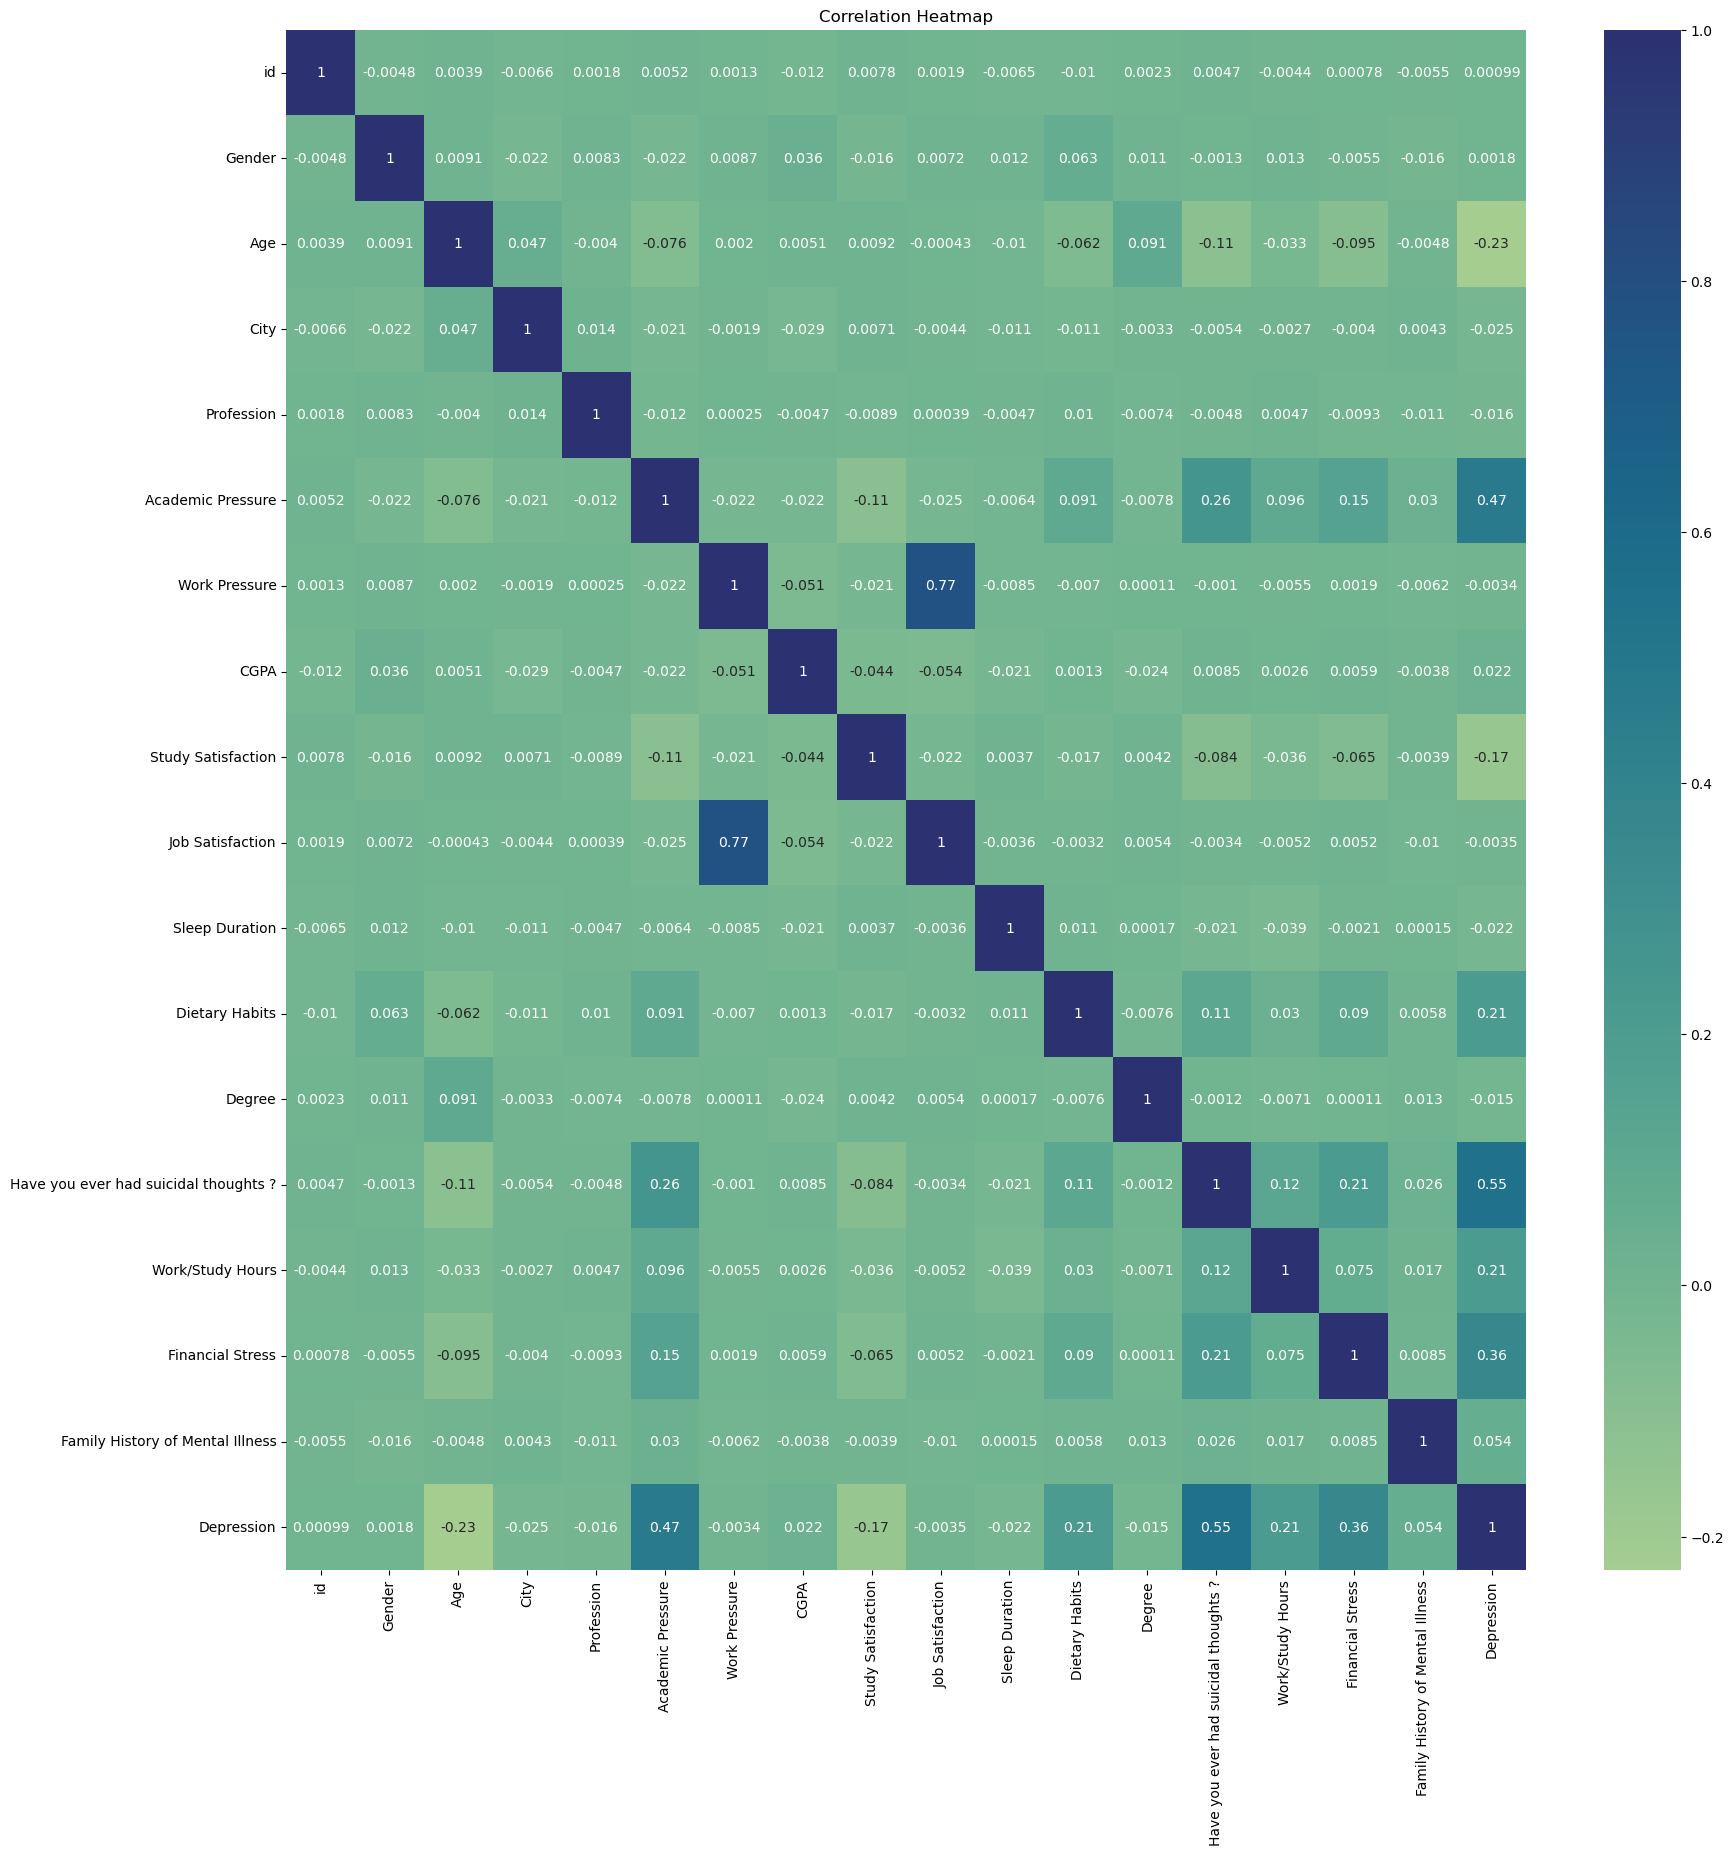

In [109]:
#heat map
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
corr_matrix = df[numeric_columns].corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True, cmap='crest')
plt.title('Correlation Heatmap')
plt.show()


In [110]:
correlation_matrix = df.corr()
target_correlation = correlation_matrix['Depression']
print(target_correlation)


id                                       0.000986
Gender                                   0.001819
Age                                     -0.226511
City                                    -0.024878
Profession                              -0.016437
Academic Pressure                        0.474793
Work Pressure                           -0.003351
CGPA                                     0.022268
Study Satisfaction                      -0.168010
Job Satisfaction                        -0.003483
Sleep Duration                          -0.022412
Dietary Habits                           0.206673
Degree                                  -0.015011
Have you ever had suicidal thoughts ?    0.546290
Work/Study Hours                         0.208627
Financial Stress                         0.363591
Family History of Mental Illness         0.053554
Depression                               1.000000
Name: Depression, dtype: float64


In [111]:
df.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

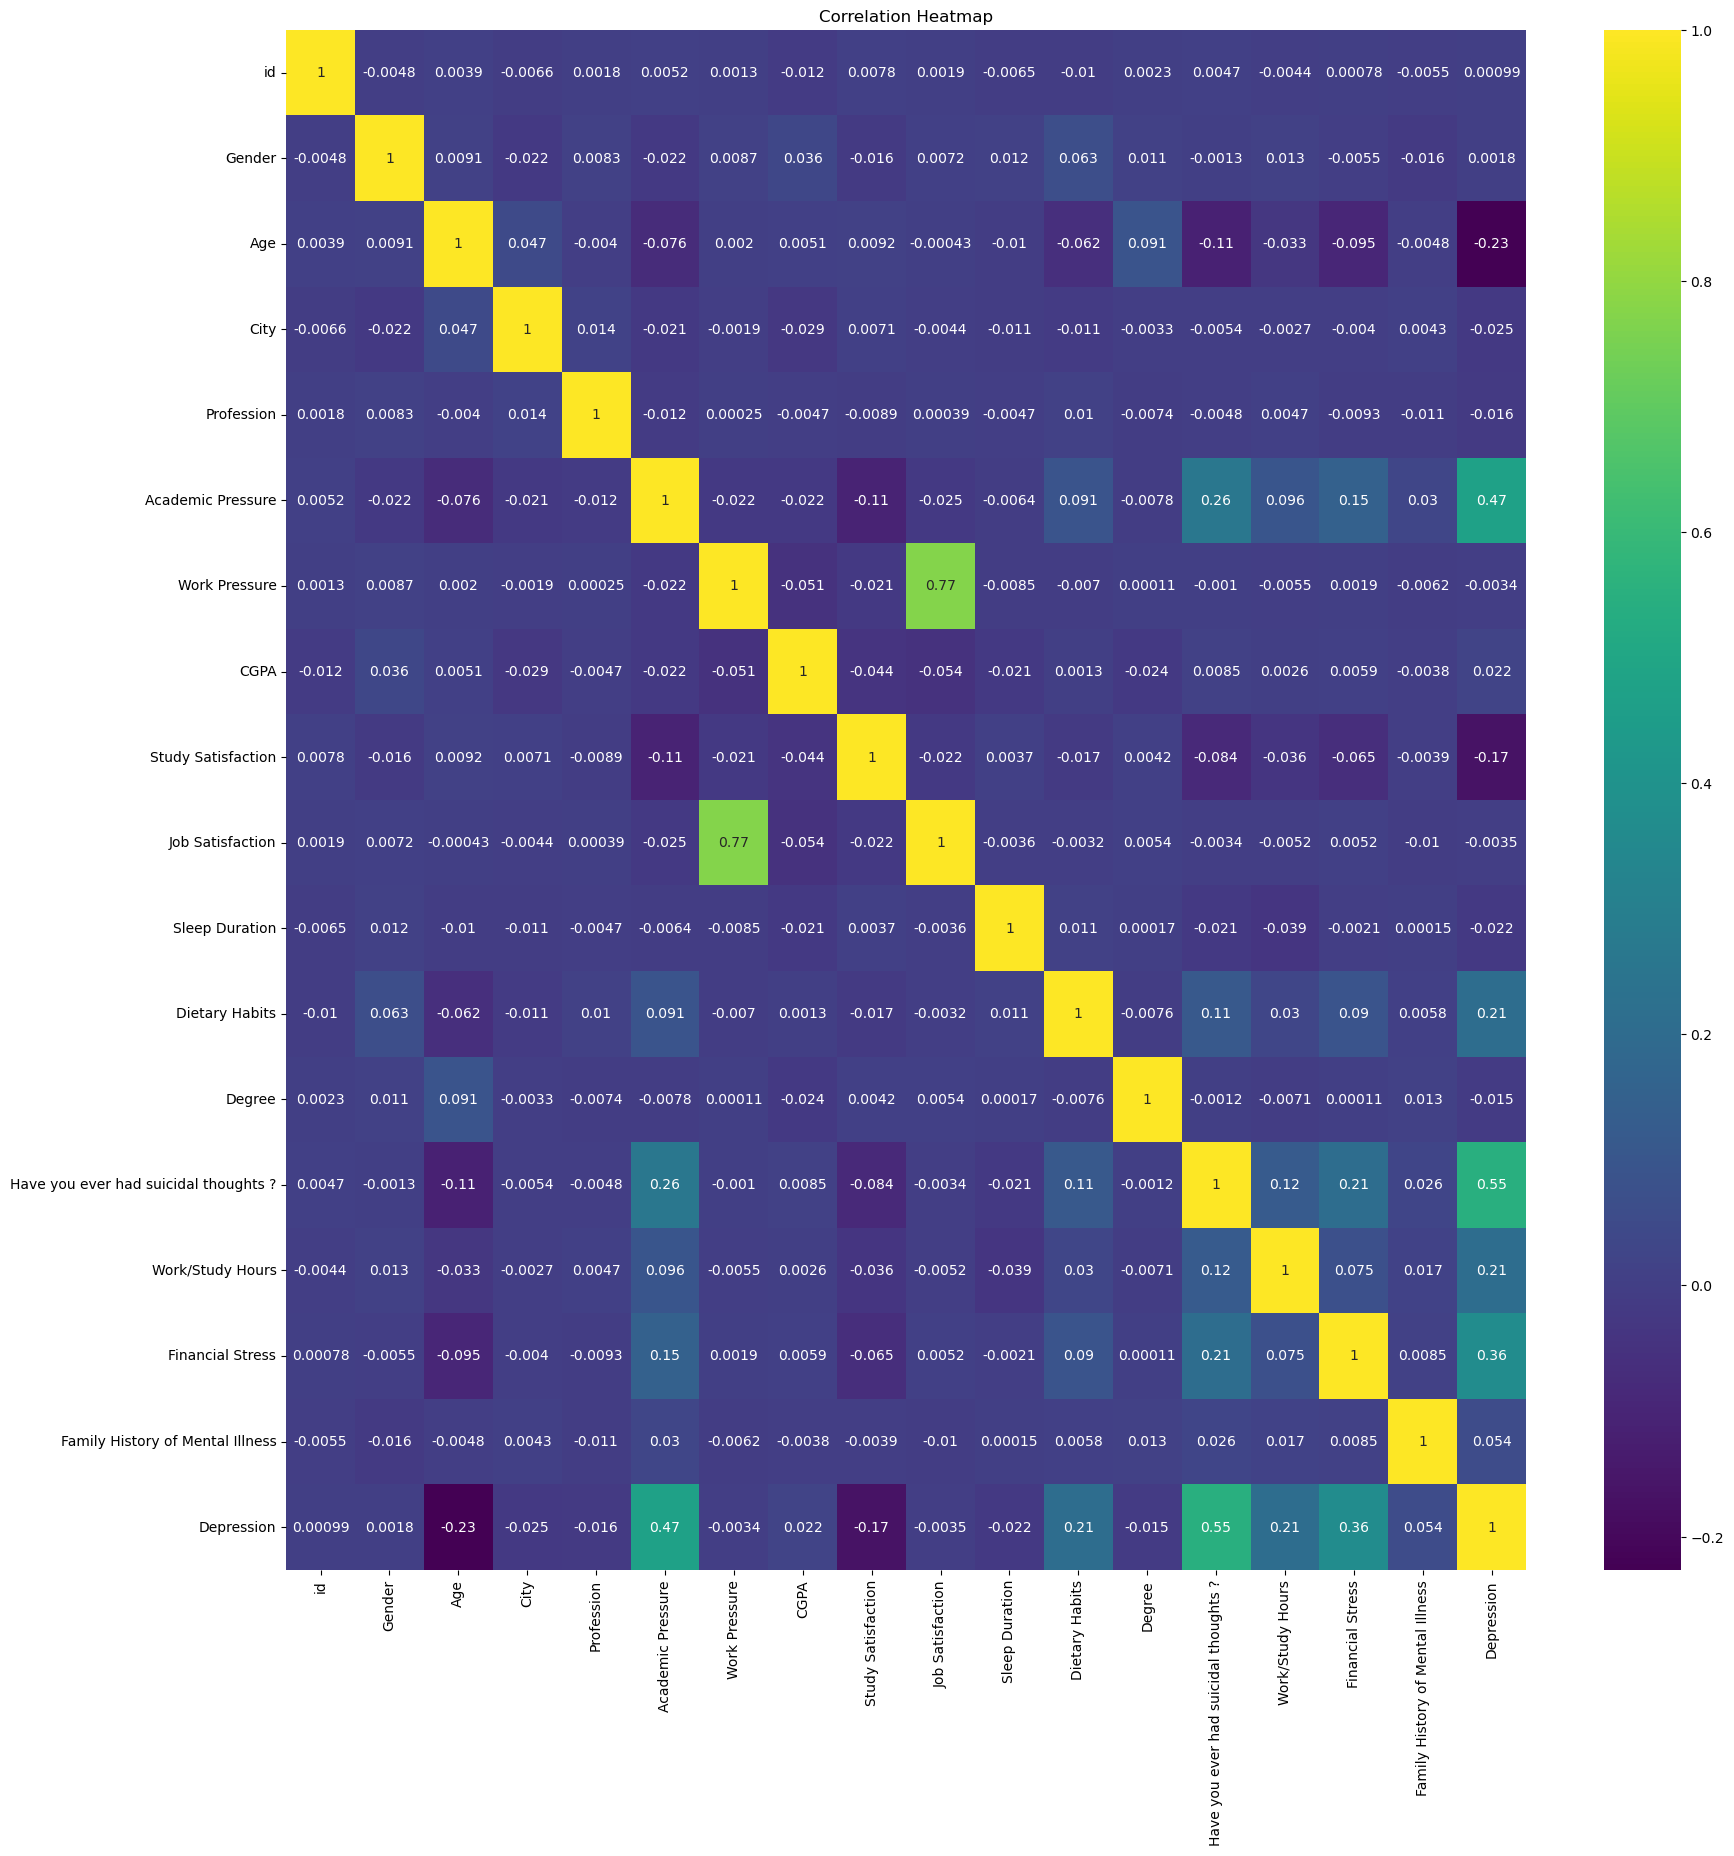

In [112]:
#heat map
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
corr_matrix = df[numeric_columns].corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True, cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()

In [65]:
def calculate_outlier_percentage(df):
    outlier_data = []

    for column in df.select_dtypes(include=[np.number]): 
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_percentage = (len(outliers) / len(df)) * 100

        outlier_data.append([column, round(outlier_percentage, 2)])

    return pd.DataFrame(outlier_data, columns=['Feature', 'Outlier Percentage'])

outlier_df = calculate_outlier_percentage(df)
print(outlier_df)

                                  Feature  Outlier Percentage
0                                      id                0.00
1                                  Gender                0.00
2                                     Age                0.04
3                                    City                0.00
4                              Profession                0.11
5                       Academic Pressure                0.00
6                           Work Pressure                0.01
7                                    CGPA                0.03
8                      Study Satisfaction                0.00
9                        Job Satisfaction                0.03
10                         Sleep Duration                0.06
11                         Dietary Habits                0.00
12                                 Degree                0.00
13  Have you ever had suicidal thoughts ?                0.00
14                       Work/Study Hours                0.00
15      

In [113]:
def apply_scaling_if_needed(df, target_column):
    numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
    
    # no need to apply scaling on target column
    if target_column in numeric_columns:
        numeric_columns.remove(target_column)

    scaler = StandardScaler()

    for column in numeric_columns:
        unique_values = set(df[column].unique())

        if unique_values == {0, 1}:  
            print(f"No need for scaling on {column}")
        else:
            df[column] = scaler.fit_transform(df[[column]])
            print(f"Scaling applied on {column}")

apply_scaling_if_needed(df, target_column='Depression')


Scaling applied on id
No need for scaling on Gender
Scaling applied on Age
Scaling applied on City
Scaling applied on Profession
Scaling applied on Academic Pressure
Scaling applied on Work Pressure
Scaling applied on CGPA
Scaling applied on Study Satisfaction
Scaling applied on Job Satisfaction
Scaling applied on Sleep Duration
Scaling applied on Dietary Habits
Scaling applied on Degree
No need for scaling on Have you ever had suicidal thoughts ?
Scaling applied on Work/Study Hours
Scaling applied on Financial Stress
No need for scaling on Family History of Mental Illness


In [114]:
df

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,-1.733236,1,1.463201,1.510523,0.025562,1.345456,-0.009777,0.893354,-0.693539,-0.01534,-1.421814,-1.182432,-1.094017,1,-1.121115,-1.488788,0,1
1,-1.733089,0,-0.371450,-1.424206,0.025562,-0.826195,-0.009777,-1.194113,1.510565,-0.01534,-1.421814,-0.375754,-0.126579,0,-1.121115,-0.793050,1,0
2,-1.732646,1,1.055501,1.082541,0.025562,-0.102311,-0.009777,-0.425762,1.510565,-0.01534,0.459507,-1.182432,-0.817606,0,0.497212,-1.488788,1,0
3,-1.732547,0,0.443950,1.388242,0.025562,-0.102311,-0.009777,-1.404899,-0.693539,-0.01534,-0.481154,-0.375754,-0.541195,1,-0.851394,1.294167,1,1
4,-1.732498,0,-0.167600,-0.629384,0.025562,0.621573,-0.009777,0.322191,0.041162,-0.01534,-1.421814,-0.375754,0.840860,1,-1.660558,-1.488788,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,1.728342,0,0.240100,1.143682,0.025562,1.345456,-0.009777,-1.296106,1.510565,-0.01534,-1.421814,1.237602,0.011627,1,-0.042230,-1.488788,1,0
27897,1.728367,1,0.240100,-0.079122,0.025562,-0.826195,-0.009777,1.185735,0.041162,-0.01534,0.459507,-1.182432,1.946503,0,-1.930279,-0.097311,1,0
27898,1.728441,1,1.055501,-1.057365,0.025562,-0.102311,-0.009777,-0.711343,0.775863,-0.01534,-1.421814,1.237602,1.531887,0,1.306376,-0.793050,0,0
27899,1.728465,0,-1.594552,-0.079122,0.025562,1.345456,-0.009777,-0.527755,-0.693539,-0.01534,0.459507,-1.182432,0.011627,1,0.766933,1.294167,0,1


In [115]:
df["Depression"].value_counts(normalize=True) * 100

Depression
1    58.552584
0    41.447416
Name: proportion, dtype: float64

In [116]:
df.drop(["id","Job Satisfaction"],axis=1,inplace=True)

In [117]:
X = df.drop(columns=['Depression'])  
y = df['Depression'] 

In [118]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

In [119]:
df.isna().sum()

Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

Complete LogisticRegression Training ! 0.8449405981155265
Complete LogisticRegression Test! 0.8494623655913979
Accuracy: 0.8495
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.80      0.81      3457
           1       0.86      0.88      0.87      4913

    accuracy                           0.85      8370
   macro avg       0.85      0.84      0.84      8370
weighted avg       0.85      0.85      0.85      8370



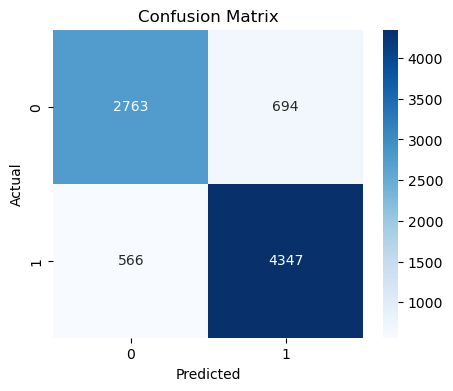

In [120]:
#first model "LogisticRegression" without any improvement    veryyyyy gooooood
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
Tr_score=model.score(X_train,y_train)
Tst_score=model.score(X_test,y_test)

print("Complete LogisticRegression Training !",Tr_score)
print("Complete LogisticRegression Test!",Tst_score)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", class_report)


plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


**Editing:**

In [52]:
from scipy.stats import zscore  # for outliers
from scipy.stats import f_oneway  # categorical test
from scipy.stats import ttest_ind  # numerical test

from imblearn.combine import SMOTEENN  # resampling

In [108]:
pred = df.drop(['City', 'Profession', 'Degree', 'Depression'], axis = 1)
res = df['Depression']

smote_enn = SMOTEENN(random_state = 42, n_jobs = -1)
X_smote, y_smote = smote_enn.fit_resample(pred, res)

print(f'Resampled dataset shape: {y_smote.value_counts(normalize = True)}')

c:\Users\eslam\anaconda3\Lib\site-packages\imblearn\over_sampling\_smote\base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Resampled dataset shape: Depression
0    0.524776
1    0.475224
Name: proportion, dtype: float64


In [109]:
data_2 = pd.concat([X_smote, y_smote], axis = 1)

data_2.head()

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,24.0,2.0,5.90,5.0,0,1,0,3.0,2.0,1,0
1,1,31.0,3.0,7.03,5.0,2,0,0,9.0,1.0,1,0
2,1,29.0,2.0,5.70,3.0,2,0,0,4.0,1.0,0,0
3,1,30.0,3.0,9.54,4.0,1,0,0,1.0,2.0,0,0
4,0,30.0,2.0,8.04,4.0,2,3,0,0.0,1.0,1,0


In [110]:
data_feat_imp = data_2.copy(deep = True)
X_ftrain, X_ftest, y_ftrain, y_ftest = train_test_split(data_feat_imp.drop('Depression', axis = 1),\
                                                    data_feat_imp['Depression'],\
                                                    test_size = 0.2,\
                                                    random_state = 42)

print(data_feat_imp.shape)
X_ftrain.shape, X_ftest.shape, y_ftrain.shape, y_ftest.shape

(19717, 12)


((15773, 11), (3944, 11), (15773,), (3944,))

In [111]:
rf_features = RandomForestClassifier(random_state = 42)
rf_features.fit(X_ftrain, y_ftrain)

feature_imp_1 = pd.DataFrame({'features': X_ftrain.columns, 'rfimportance': rf_features.feature_importances_})\
                            .sort_values(by = 'rfimportance', ascending = False)\
                            .reset_index(drop = 'first')

C:\Users\eslam\AppData\Local\Temp\ipykernel_40920\3194566576.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


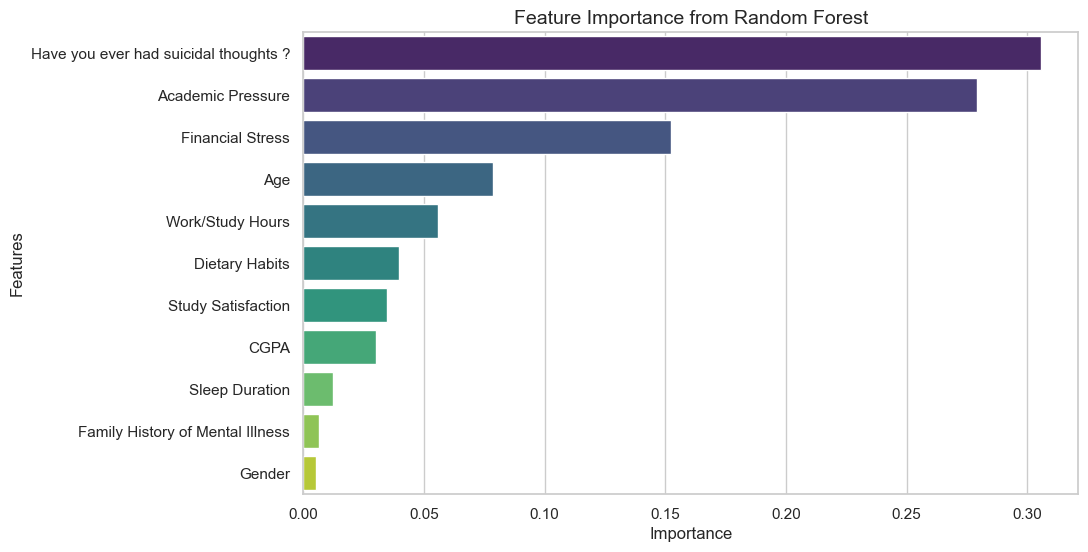

In [112]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x = 'rfimportance', 
    y = 'features', 
    data = feature_imp_1, 
    palette = 'viridis'
)

plt.title("Feature Importance from Random Forest", fontsize = 14)
plt.xlabel("Importance", fontsize = 12)
plt.ylabel("Features", fontsize = 12)
plt.show()

In [113]:
## gb feature importance.

gb_features = GradientBoostingClassifier(random_state = 42)
gb_features.fit(X_ftrain, y_ftrain)

feature_imp_2 = pd.DataFrame({'features': X_ftrain.columns, 'gbimportance': gb_features.feature_importances_})\
                               .sort_values(by = 'gbimportance', ascending = False)\
                               .reset_index(drop = 'first')

C:\Users\eslam\AppData\Local\Temp\ipykernel_40920\191529628.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


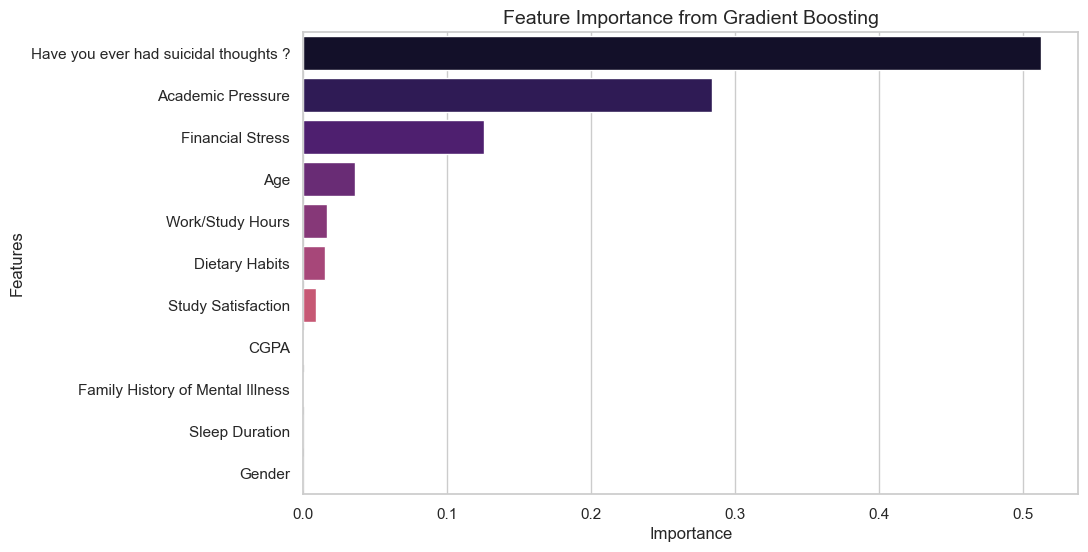

In [114]:
## plot.

plt.figure(figsize=(10, 6))
sns.barplot(
    x = 'gbimportance', 
    y = 'features', 
    data = feature_imp_2, 
    palette = 'magma'
)

plt.title("Feature Importance from Gradient Boosting", fontsize = 14)
plt.xlabel("Importance", fontsize = 12)
plt.ylabel("Features", fontsize = 12)
plt.show()

In [116]:
## adb feature importance.
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier  # model & features importance

ab_features = AdaBoostClassifier(random_state = 42)
ab_features.fit(X_ftrain, y_ftrain)

feature_imp_3 = pd.DataFrame({'features': X_ftrain.columns, 'abimportance': ab_features.feature_importances_})\
                               .sort_values(by = 'abimportance', ascending = False)\
                               .reset_index(drop = 'first')

c:\Users\eslam\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


C:\Users\eslam\AppData\Local\Temp\ipykernel_40920\2967797822.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


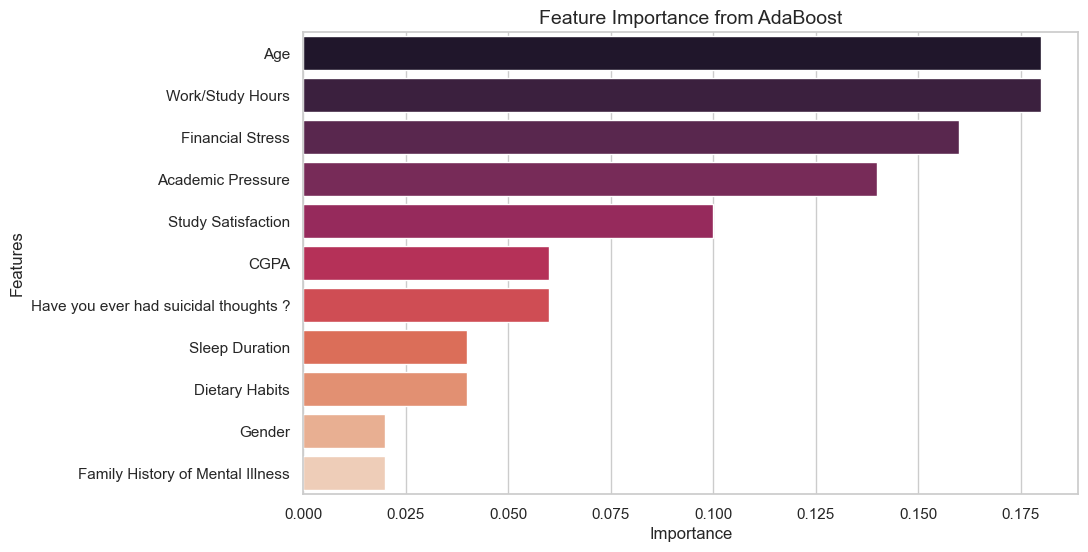

In [117]:
## plot.

plt.figure(figsize=(10, 6))
sns.barplot(
    x = 'abimportance', 
    y = 'features', 
    data = feature_imp_3, 
    palette = 'rocket'
)

plt.title("Feature Importance from AdaBoost", fontsize = 14)
plt.xlabel("Importance", fontsize = 12)
plt.ylabel("Features", fontsize = 12)
plt.show()

In [119]:
## mutual info classif feature importance.
from sklearn.feature_selection import mutual_info_classif  # feature importance

mi_scores = mutual_info_classif(X_ftrain, y_ftrain)

feature_imp_4 = pd.DataFrame({'features': X_ftrain.columns, 'importance': mi_scores})\
                               .sort_values(by = 'importance', ascending = False)
mi_scores

array([0.00287208, 0.12763239, 0.32197085, 0.11204211, 0.09460701,
       0.00886091, 0.06373216, 0.27207486, 0.11801802, 0.2193801 ,
       0.01479395])

C:\Users\eslam\AppData\Local\Temp\ipykernel_40920\3214796205.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


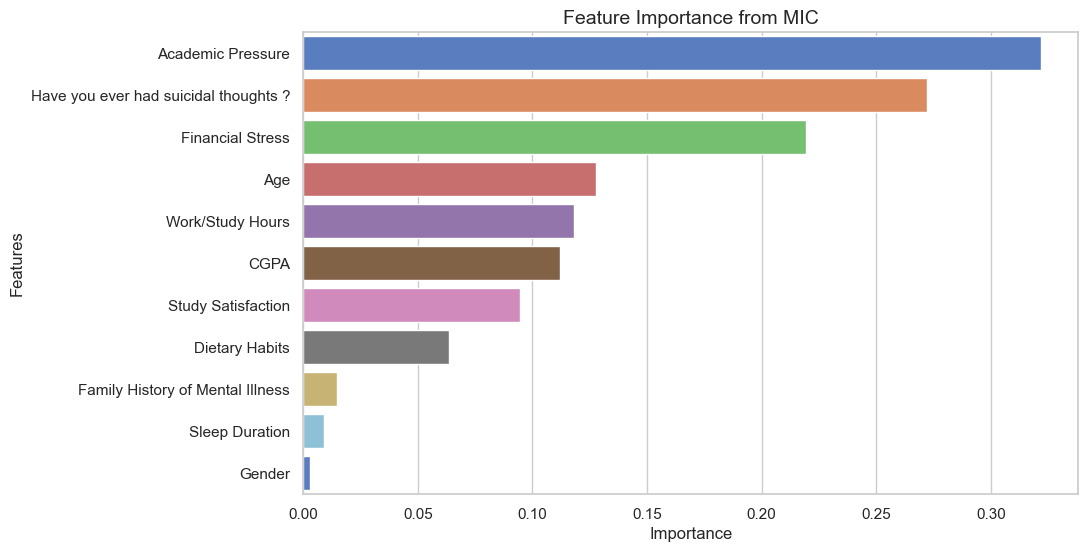

In [121]:
## plot.

plt.figure(figsize=(10, 6))
sns.barplot(
    x = 'importance', 
    y = 'features', 
    data = feature_imp_4, 
    palette = 'muted'
)

plt.title("Feature Importance from MIC", fontsize = 14)
plt.xlabel("Importance", fontsize = 12)
plt.ylabel("Features", fontsize = 12)
plt.show()

In [123]:
data_2.head()

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,24.0,2.0,5.90,5.0,0,1,0,3.0,2.0,1,0
1,1,31.0,3.0,7.03,5.0,2,0,0,9.0,1.0,1,0
2,1,29.0,2.0,5.70,3.0,2,0,0,4.0,1.0,0,0
3,1,30.0,3.0,9.54,4.0,1,0,0,1.0,2.0,0,0
4,0,30.0,2.0,8.04,4.0,2,3,0,0.0,1.0,1,0


--------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [46]:
df.head()

,Gender,Age,City,Profession,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,1,33.0,51,11,5.0,8.97,2.0,0,0,3,1,3.0,1.0,0,1
1,0,24.0,3,11,2.0,5.90,5.0,0,1,10,0,3.0,2.0,1,0
2,1,31.0,44,11,3.0,7.03,5.0,2,0,5,0,9.0,1.0,1,0
3,0,28.0,49,11,3.0,5.59,2.0,1,1,7,1,4.0,5.0,1,1
4,0,25.0,16,11,4.0,8.13,3.0,0,1,17,1,1.0,1.0,0,0


In [128]:
# Assuming the last column is the target variable
X = data_2.iloc[:, :-1]
y = data_2.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional, but recommended for some models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [129]:
# Define a list of models to evaluate
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('SVM', SVC()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('MLP', MLPClassifier(max_iter=1000)),
    ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
    ('LightGBM', LGBMClassifier()),
    ('CatBoost', CatBoostClassifier(verbose=0))
]

# Evaluate each model using cross-validation
results = []
names = []
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print(f'{name}: {cv_results.mean():.4f} ({cv_results.std():.4f})')

Logistic Regression: 0.9634 (0.0019)
Decision Tree: 0.9516 (0.0023)
Random Forest: 0.9737 (0.0017)
Gradient Boosting: 0.9696 (0.0013)
SVM: 0.9673 (0.0030)
K-Nearest Neighbors: 0.9559 (0.0035)
Naive Bayes: 0.9500 (0.0033)
MLP: 0.9651 (0.0025)


c:\Users\eslam\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:20:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\eslam\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:20:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\eslam\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:20:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\eslam\anaconda3\Lib\site-packages\

XGBoost: 0.9752 (0.0019)
[LightGBM] [Info] Number of positive: 6010, number of negative: 6608
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000799 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1545
[LightGBM] [Info] Number of data points in the train set: 12618, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.476304 -> initscore=-0.094856
[LightGBM] [Info] Start training from score -0.094856
[LightGBM] [Info] Number of positive: 6010, number of negative: 6608
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000125 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1546
[LightGBM] [Info] Number of data points in the train set: 12618, number of used features: 

In [130]:
# Find the best model based on cross-validation results
best_model_index = np.argmax([np.mean(result) for result in results])
best_model_name, best_model = models[best_model_index]
print(f'\nBest Model: {best_model_name} with accuracy: {np.mean(results[best_model_index]):.4f}')


Best Model: XGBoost with accuracy: 0.9752


In [131]:
# Train the best model on the full training set
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
print(f'\nTest Set Accuracy: {accuracy_score(y_test, y_pred):.4f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Test Set Accuracy: 0.9762

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2087
           1       0.97      0.98      0.97      1857

    accuracy                           0.98      3944
   macro avg       0.98      0.98      0.98      3944
weighted avg       0.98      0.98      0.98      3944


Confusion Matrix:
[[2036   51]
 [  43 1814]]


c:\Users\eslam\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:20:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
